In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
# Load Titanic dataset 
df = pd.read_csv('C:/Users/kdehn/OneDrive - stevens.edu/___Data/CSV_files/Titanic_rows.csv')

print(df[df.isna().any(axis=1)]) # shows NaN values in data frame if it exists
df.info()

Empty DataFrame
Columns: [Class, Sex, Age, Survived]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Class     2201 non-null   object
 1   Sex       2201 non-null   object
 2   Age       2201 non-null   object
 3   Survived  2201 non-null   object
dtypes: object(4)
memory usage: 68.9+ KB


In [3]:
df_num= df.select_dtypes(exclude='object')
df_obj= df.select_dtypes(include='object')
df_num.info()
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Empty DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Class     2201 non-null   object
 1   Sex       2201 non-null   object
 2   Age       2201 non-null   object
 3   Survived  2201 non-null   object
dtypes: object(4)
memory usage: 68.9+ KB


0    1490
1     711
Name: Survived_Yes, dtype: int64
0    1490
1     711
Name: Survived_Yes, dtype: int64
0    67.696502
1    32.303498
Name: Survived_Yes, dtype: float64


,Class_2nd,Class_3rd,Class_Crew,Sex_Male,Age_Child,Survived_Yes
0,0,1,0,1,1,0
1,0,1,0,1,1,0
2,0,1,0,1,1,0
3,0,1,0,1,1,0
4,0,1,0,1,1,0


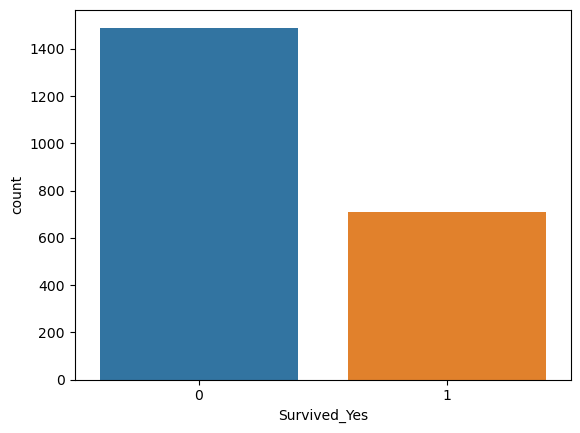

In [4]:
df_obj= pd.get_dummies(df_obj, drop_first=True)
print(df_obj['Survived_Yes'].value_counts())
print(df_obj['Survived_Yes'].value_counts())
print( (df_obj['Survived_Yes'].value_counts()/ df_obj['Survived_Yes'].value_counts().sum()) * 100)
sns.countplot(data=df_obj, x='Survived_Yes')
df_obj.head()

In [5]:
attr = df_obj.drop('Survived_Yes', axis=1)
target = df_obj['Survived_Yes']

# Split the data into training and testing sets
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.2, random_state=5)

In [6]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,random_state=7)


In [7]:
model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)
 

In [8]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"Accuracy= {accuracy_score(target_test,target_pred)}")

print(confusion_matrix(target_test,target_pred))
print(classification_report(target_test,target_pred))

Accuracy= 0.7755102040816326
[[295   5]
 [ 94  47]]
              precision    recall  f1-score   support

           0       0.76      0.98      0.86       300
           1       0.90      0.33      0.49       141

    accuracy                           0.78       441
   macro avg       0.83      0.66      0.67       441
weighted avg       0.80      0.78      0.74       441



In [ ]:
# Export the first three decision trees from the forest
## requires graphviz
# for i in range(3):
#     tree = rf.estimators_[i]
#     dot_data = export_graphviz(tree,
#                                feature_names=X_train.columns,  
#                                filled=True,  
#                                max_depth=2, 
#                                impurity=False, 
#                                proportion=True)
#     graph = graphviz.Source(dot_data)
#     display(graph)

In [9]:

# Feature importance for Mean Decrease Accuracy
mean_decrease_accuracy = model.feature_importances_
print(f"Mean Decrease Accuracy{ mean_decrease_accuracy}")
# # Feature importance for Mean Decrease GINI
# # Note: GINI importance is specific to decision trees and random forests
gini_importance = model.feature_importances_ * model.estimators_[0].tree_.impurity[0]
print(f"\nMean Decrease GINI= {gini_importance}")
 

Mean Decrease Accuracy[0.03612261 0.15327563 0.04655945 0.69136823 0.07267408]

Mean Decrease GINI= [0.01503865 0.06381207 0.01938374 0.28783202 0.03025584]


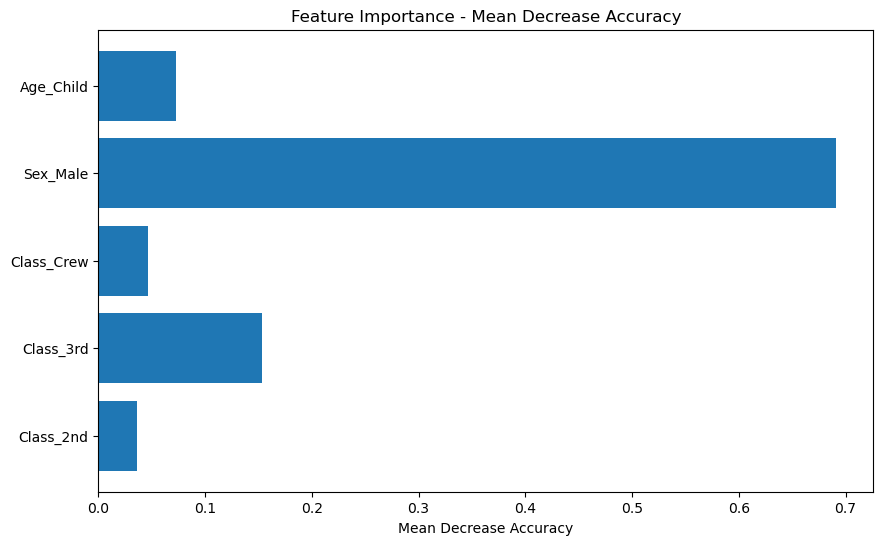

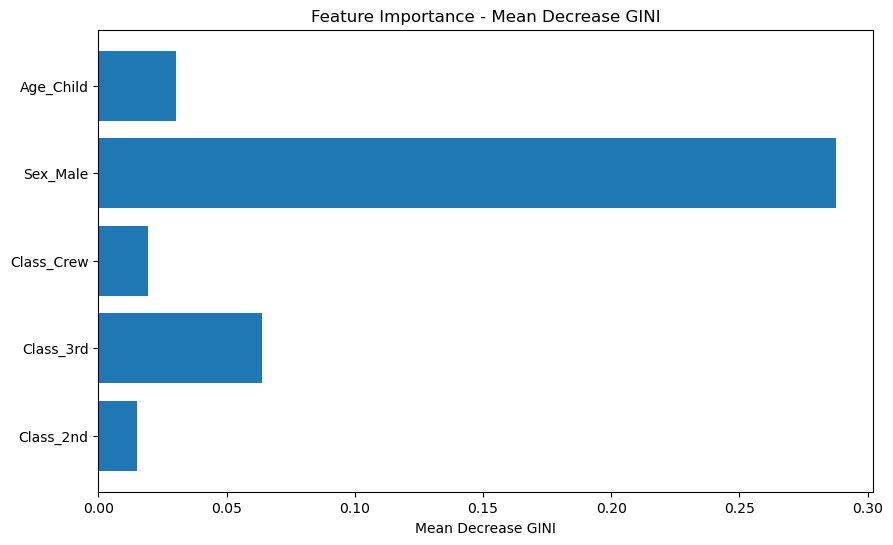

In [10]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(mean_decrease_accuracy)), mean_decrease_accuracy, align='center')
plt.yticks(range(len(mean_decrease_accuracy)), attr.columns)
plt.xlabel('Mean Decrease Accuracy')
plt.title('Feature Importance - Mean Decrease Accuracy')
plt.show()
plt.figure(figsize=(10, 6))
plt.barh(range(len(gini_importance)), gini_importance, align='center')
plt.yticks(range(len(gini_importance)), attr.columns)
plt.xlabel('Mean Decrease GINI')
plt.title('Feature Importance - Mean Decrease GINI')
plt.show()

In [ ]:

feature_scores = pd.Series(model.feature_importances_, index=attr_train.columns).sort_values(ascending=False)

print(feature_scores)